# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


**Performed by :** Jean-Baptiste GOMEZ

## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

In [1]:
#Required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Data Validation

In [2]:
#loading data
data_prod_sales = pd.read_csv('product_sales.csv')
data_prod_sales.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [3]:
#find the shape of our dataset
data_prod_sales.shape

(15000, 8)

As we can see our dataframe as 8 columns and 15000 observations.

In [4]:
#find all informations on columns of our dataset
data_prod_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [5]:
#search for duplicate values in customer_id column
data_prod_sales.duplicated(subset='customer_id').sum()

0

In [6]:
#checking missing numbers for each columns
data_prod_sales.isna().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

As we can see we are **1074** missing data in the column **revenue**.

In [7]:
#Checking Table Values 
print(data_prod_sales['sales_method'].unique())
print(data_prod_sales['state'].unique())
print(data_prod_sales['week'].unique())

['Email' 'Email + Call' 'Call' 'em + call' 'email']
['Arizona' 'Kansas' 'Wisconsin' 'Indiana' 'Illinois' 'Mississippi'
 'Georgia' 'Oklahoma' 'Massachusetts' 'Missouri' 'Texas' 'New York'
 'Maryland' 'California' 'Tennessee' 'Pennsylvania' 'North Dakota'
 'Florida' 'Michigan' 'North Carolina' 'Hawaii' 'Colorado' 'Louisiana'
 'Virginia' 'New Mexico' 'Arkansas' 'Alaska' 'Oregon' 'New Hampshire'
 'Ohio' 'New Jersey' 'Connecticut' 'Iowa' 'Montana' 'Washington'
 'Kentucky' 'Alabama' 'Nebraska' 'South Carolina' 'Minnesota'
 'South Dakota' 'Delaware' 'Maine' 'Utah' 'West Virginia' 'Vermont'
 'Rhode Island' 'Nevada' 'Idaho' 'Wyoming']
[2 6 5 4 3 1]


We need to fix **Sales_Method** as there are some duplication like 'email' and "Email",  'Email + Call' and 'em + call'.

In [8]:
print("Count of 'email' in sales_method column:", data_prod_sales['sales_method'].value_counts()['email'])
print("Count of 'em + call' in sales_method column:", data_prod_sales['sales_method'].value_counts()['em + call'])

Count of 'email' in sales_method column: 10
Count of 'em + call' in sales_method column: 23


In [9]:
#the mapping to standardize the values
mapping = {'Email': 'Email',
           'Email + Call': 'Email + Call',
           'Call': 'Call',
           'em + call': 'Email + Call',
           'email': 'Email'}

#replace the values in the 'sales_method' column using the defined mapping
data_prod_sales['sales_method'] = data_prod_sales['sales_method'].replace(mapping)


In [10]:
#drop columns with missing or NaN values
data_prod_sales = data_prod_sales.dropna(subset=['revenue'])

In [11]:
#Shape after cleaning & dropping missing values 
data_prod_sales.shape

(13926, 8)

- years_as_customer

In [12]:
#checking the values of years as customer column 
data_prod_sales['years_as_customer'].value_counts().sort_index()

years_as_customer
0     1348
1     2336
2     1841
3     1500
4     1232
5     1042
6      856
7      661
8      555
9      476
10     376
11     301
12     267
13     230
14     157
15     144
16     114
17      80
18      76
19      53
20      53
21      36
22      38
23      16
24      24
25      16
26      19
27      14
28       8
29       5
30       9
31       6
32       5
33       8
34       7
35       5
36       4
37       2
38       2
39       2
47       1
63       1
Name: count, dtype: int64

We can identify outliers in the **years_as_customer** column as those with values of 47 and 63, each occurring only once. In other words, we should remove customers whose **years_as_customer** exceeds 40 years.

In [13]:
#Drop rows that are outliers i.e exceeds 40 'years_as_customer'
data_prod_sales.drop(data_prod_sales[data_prod_sales['years_as_customer'] > 40].index, axis=0, inplace=True)

- state

In [14]:
#Checking the breakdown of values across State column
data_prod_sales['state'].value_counts()

state
California        1737
Texas             1109
New York           899
Florida            826
Illinois           576
Pennsylvania       553
Ohio               520
Michigan           466
Georgia            460
North Carolina     430
New Jersey         402
Virginia           346
Indiana            327
Washington         309
Tennessee          308
Arizona            295
Missouri           286
Massachusetts      270
Maryland           245
Wisconsin          235
Minnesota          228
Oregon             214
Louisiana          213
South Carolina     213
Colorado           212
Alabama            202
Kentucky           202
Oklahoma           184
Connecticut        167
Iowa               154
Mississippi        133
Kansas             129
Arkansas           118
Utah               115
Nevada              97
Nebraska            86
New Mexico          79
West Virginia       77
Hawaii              67
Maine               60
Idaho               59
New Hampshire       48
Montana             43
Rhode

In [15]:
#number of states
len(data_prod_sales['state'].unique())

50

- nb_sold

In [16]:
#Checking the breakdown of values across State column
data_prod_sales['nb_sold'].value_counts().sort_index()

nb_sold
7      681
8     1838
9     3316
10    3422
11    2276
12     961
13     846
14      93
15     461
16      30
Name: count, dtype: int64

In [17]:
data_prod_sales['nb_sold'].nunique()

10

## Summary Data Validation
Before cleaning and validation, the original dataset comprised 15,000 rows and 8 columns. Following validation against the dataset table criteria:

- **week**: With 6 unique values ranging from 1 to 6, no cleaning was necessary.
- **sales_method**: With 3 unique methods including Call, Email, and Email+Call, adjustments were made. 23 entries such as "em + call" and 10 entries like "email" were corrected.
- **customer_id**: A character variable without missing values, aligned with the description, required no cleaning.
- **nb_sold**: With 10 numeric categories ranging from 7 to 16 and no missing values, no cleaning was required.
- **revenue**: Containing numeric values with 1,074 missing values, these entries were dropped.
- **years_as_customer**: Held numeric values with 2 outliers identified: customers with 47 and 63 years as customers. Since the store has been in existence for 40 years, dating back to 1984, these were considered outliers and removed.
- **nb_site_visits**: Consisting of numeric values without missing entries, in line with the description, no cleaning was needed.
- **state**: Featuring 50 possible values without any missing entries, in accordance with the description, no cleaning was necessary.

Post-cleaning and validation, the dataset contained 13,926 rows and 8 columns.

# Exploratory Analysis

- **Distribution of  Number of New Products Sold**

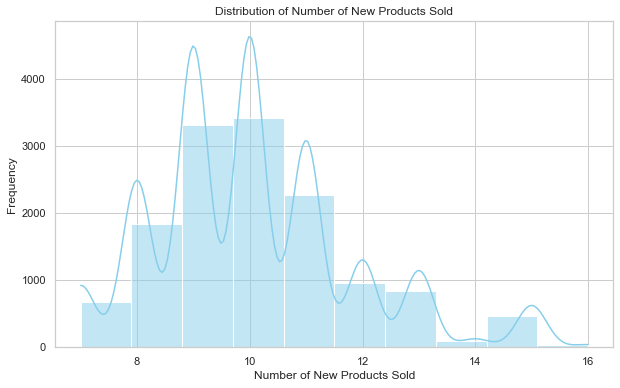

In [18]:
#Plotting the distribution of Number of New Products Sold
#Set the style
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data=data_prod_sales, x='nb_sold', kde=True, bins=10, color='skyblue')
plt.title('Distribution of Number of New Products Sold')
plt.xlabel('Number of New Products Sold')
plt.ylabel('Frequency')
plt.show()

The distribution of new products sold by customers reveals a notable concentration around 9 and 10 products. Specifically, over 3500 customers made purchases comprising precisely 9 or 10 products. Overall, the distribution appears approximately normal, albeit with a positive skew.

- **Distribution of  number of times the customer has visited our website in the last 6 months**

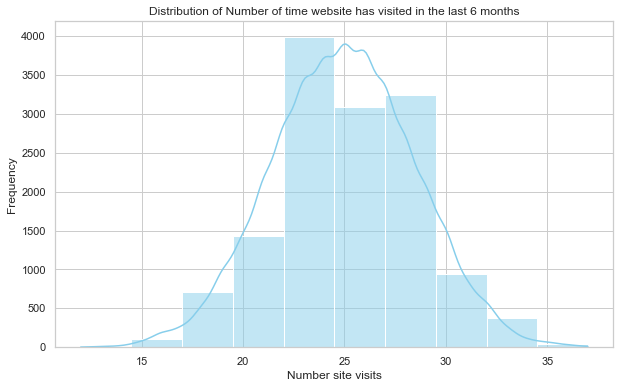

In [19]:
#Plotting the distribution of number of time website has visited in the last 6 months
plt.figure(figsize=(10, 6))
sns.histplot(data=data_prod_sales, x='nb_site_visits', kde=True, bins=10, color='skyblue')
plt.title('Distribution of Number of time website has visited in the last 6 months')
plt.xlabel('Number site visits')
plt.ylabel('Frequency')
plt.show()

The site's visitation pattern closely resembles a normal distribution, with an average of 25 visits per customer over the past six months. This average behavior was displayed by more than 1600 customers, and over 90% of customers visited the site between 15 and 35 times. Additionally, the distribution data indicates that approximately 4000 customers visited the site between 24 and 26 times during the same six-month period.

## 1. How many customers were there for each approach?

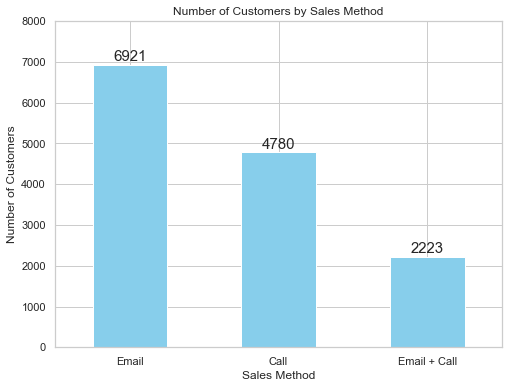

In [20]:
#Plotting number of customers for Each Sales Approach
plt.figure(figsize=(8, 6))
ax = data_prod_sales.sales_method.value_counts().plot(kind="bar", title='Number of Customers by Sales Method', color="skyblue")
ax.set_xlabel("Sales Method")
ax.set_ylabel("Number of Customers")
ax.set_ylim(0, 8000)
for i in ax.containers:
    ax.bar_label(i, label_type="edge", fontsize=15, padding=1)
plt.xticks(rotation=0)
plt.show()

The bar chart depicting sales methods reveals that **Email** was the most successful method, achieving 6,921 sales. It was followed by the **Call** method, which secured 4,780 sales, and the combined **Email + Call** method, which accounted for 2,223 sales. Notably, sales via Email constituted approximately 50% of the total sales.

## 2. What does the spread of revenue look like overall? And for each method?

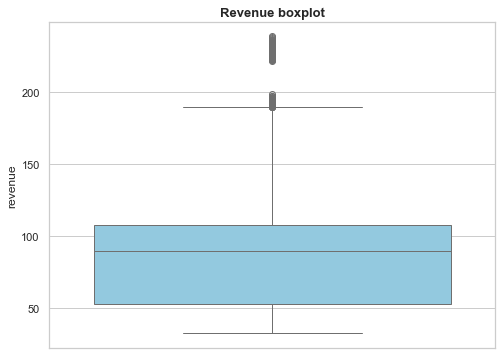

In [21]:
#Display a boxplot of revenue 
plt.figure(figsize=(8, 6))
sns.boxplot(y=data_prod_sales["revenue"], color="skyblue").set_title('Revenue boxplot', fontdict={'size': 13, 'weight': 'bold'})

#Display the plot
plt.show()

The boxplot chart displaying the distribution of revenue shows that the median value is slightly under 100.00. The interquartile range, highlighting the middle 50% of revenues per customer, lies approximately between 50.00 and 100.00. Furthermore, any values exceeding 190.00 are deemed outliers.

In [22]:
#Histogram
def display_histplot(data, x_arg, title, x_label, y_label, bin_size):
    
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.histplot(data=data, x=x_arg, bins=bin_size, ax=ax, color='skyblue')
    
    ax.set_title(title, fontsize=15, fontweight='bold')
    ax.set_xlabel(x_label, fontsize=13, fontweight='bold')
    ax.set_ylabel(y_label, fontsize=13, fontweight='bold')
    
    sns.despine()
    plt.show()

#Boxplot
def display_boxplot(data, x_arg, y_arg, title, x_label, y_label, palette):
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.boxplot(data=data, x=x_arg, y=y_arg, hue=x_arg, palette=palette, ax=ax, legend=False)
    
    ax.set_title(title, fontsize=15, fontweight='bold')
    ax.set_xlabel(x_label, fontsize=13, fontweight='bold')
    ax.set_ylabel(y_label, fontsize=13, fontweight='bold')
    
    sns.despine()
    plt.show()

In [23]:
#Display plot of Total Revenue by Sales Method
def display_plot(kind, data, x_arg, y_arg, hue, title, x_label, y_label, color, marker_=None):
    plt.figure(figsize=(8, 6))
    ax = kind(data=data, x=x_arg, y=y_arg, hue=hue, color=color)
    set_plot_labels(title, x_label, y_label)

    if kind == sns.barplot:
        annotate_bars(ax)

    plt.show()

def annotate_bars(ax):
    total = sum(p.get_height() for p in ax.patches)
    for p in ax.patches:
        annotation = '{:.1f}%'.format((p.get_height() / total) * 100)
        ax.annotate(annotation, (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', size='12')

def set_plot_labels(title, x_label, y_label):
    plt.title(title, size=15, weight='bold')
    plt.xlabel(x_label, size=13, weight='bold')
    plt.ylabel(y_label, size=13, weight='bold')

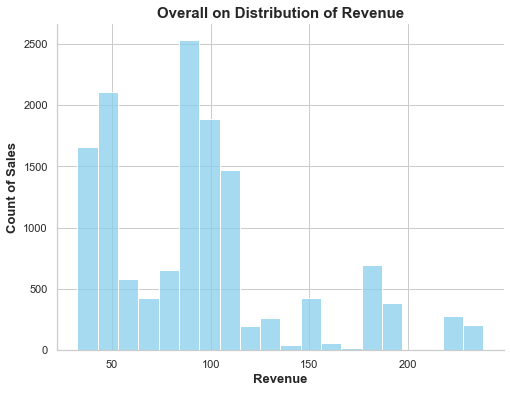

In [24]:
#Displaying a Histogram to Visualize the Overall Spread of Revenue
display_histplot(data=data_prod_sales, x_arg='revenue', title = 'Overall on Distribution of Revenue', x_label='Revenue', y_label='Count of Sales', bin_size=20)

In the revenue histogram, two concentrations of sales can be observed around 50.00 and 100.00, with greater dispersion noted around the latter value, specifically between the range of 50 to 90. Moreover, at the 50.00 purchase value, there is a noticeable peak of approximately 2100 customers, and around the 90.00 purchase value, a peak of about 2600 customers can be identified.

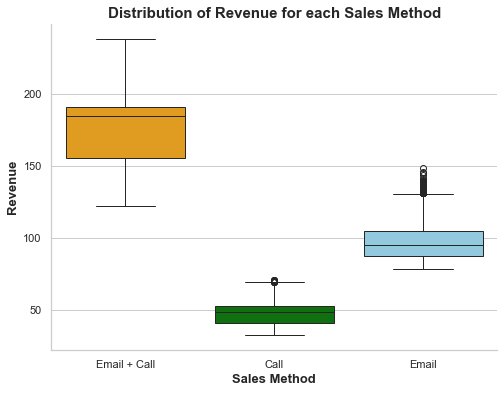

In [25]:
#Boxplot to Display the Spread of Revenue for Each Sales Method
display_boxplot(data=data_prod_sales, x_arg='sales_method', y_arg='revenue', title='Distribution of Revenue for each Sales Method', x_label='Sales Method', y_label='Revenue', palette = ['orange', 'green', 'skyblue'])

When examining the revenue distribution by sales method, distinct differences emerge in their medians and overall spread. The **Email + Call** method is notable for its broad spread and higher median, approximately 190.00. Conversely, the **Call** method features a more limited spread and a lower median, roughly 50.00. Positioned between these is the **Email** method, which displays a narrow spread similar to the Call method but boasts a higher median, close to 90.00.

***The spread of the revenue for each method in percentage***

In [26]:
revenue_by_method = data_prod_sales.groupby('sales_method')['revenue'].sum().reset_index().sort_values(by='revenue', ascending=False)

print(f"Revenue by method:\n{revenue_by_method}")

Revenue by method:
   sales_method    revenue
1         Email  672220.61
2  Email + Call  408256.69
0          Call  227513.02


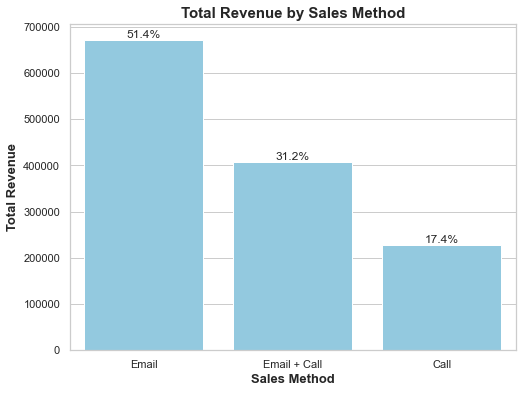

In [27]:
display_plot(sns.barplot, revenue_by_method, 'sales_method', 'revenue', None, 'Total Revenue by Sales Method', 'Sales Method', 'Total Revenue', 'skyblue')

The chart above illustrates the distribution of revenues between the different sales methods. **Calls** generated the least revenue, accounting for around 17,4% of the total. **Email + Call** accounted for around 31,2% of revenue, while **Email** was the most productive method, accounting for around 51,4% of total revenue.

## 3. Was there any difference in revenue over time for each of the methods?

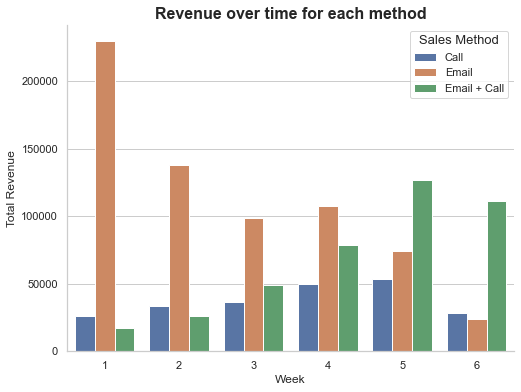

In [28]:
#Grouping the data by week and sales method, and summing the revenue
sum_revenue = data_prod_sales.groupby(['week', 'sales_method'])['revenue'].sum().reset_index()

#Creating the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=sum_revenue, x="week", y="revenue", hue="sales_method", errorbar=None)
plt.title('Revenue over time for each method', fontdict={'size': 16, 'weight': 'bold'})
plt.xlabel("Week", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.legend(title="Sales Method", title_fontsize='13', fontsize='11')

sns.despine()  
plt.show()


When analyzing the line graph data, it's evident that the **Email** sales method initially generated the highest revenue, starting Week 1 at its peak approximately 230,000.00, but experienced a significant decline over the following weeks. By Week 3, revenues from the **Email** method had dropped by over 58%, falling to around 99,000.00. In contrast, the **Email + Call** method, although starting at a lower revenue point than the Email-only approach, surpassed all others by the end of the period, taking the lead in revenue generation. This trend suggests that the **Email + Call** method is the most effective, and we would recommend prioritizing this approach moving forward. It consistently showed upward momentum, reaching its peak in Week 6, and it's likely it would have continued to perform well if observed for a longer duration. Conversely, the **Call-only** approach showed minimal fluctuation, starting and ending with low revenue, **indicating that strategies focusing solely on Email or combining Email and Calls might be more effective in engaging customers.**

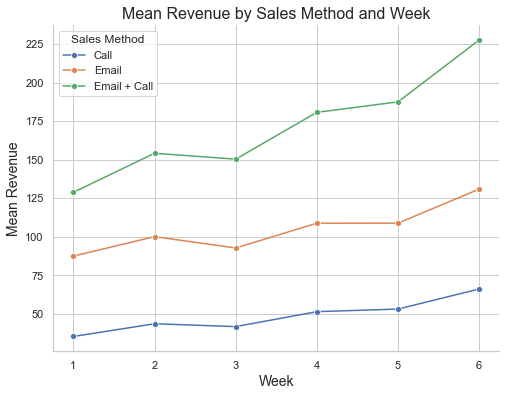

In [29]:
#Look for the average weekly revenue per Sales Method
avg_weekly_revenue = data_prod_sales.groupby(['week', 'sales_method'])['revenue'].mean().reset_index()
#Create the plot 
plt.figure(figsize=(8, 6))
sns.lineplot(data=avg_weekly_revenue, x='week', y='revenue', hue='sales_method', marker='o')
plt.title('Mean Revenue by Sales Method and Week', fontsize=16)
plt.xlabel('Week', fontsize=14)
plt.ylabel('Mean Revenue', fontsize=14)
plt.legend(title='Sales Method')

sns.despine() 
plt.show()

Analyzing the average weekly revenue for each sales method, it's evident that **Email + Call** consistently starts at the highest mean revenue, while the 'Call' method generates the lowest. This trend persists throughout the subsequent weeks, with all methods showing an upward trajectory over time, yet maintaining their relative positions. Overall, **Email + Call** consistently leads in generating the highest average revenue, followed by **Email** and **Call** respectively.

## 4. Based on the Data, which method would you recommend we continue to use?

In [30]:
#Average weekly revenue for each sales method
data_prod_sales.groupby('sales_method')['revenue'].mean().to_frame()

,revenue
sales_method,
Call,47.596866
Email,97.127671
Email + Call,183.651233


Based on the data and accompanying charts, it is evident that the standalone calling approach yields the least favorable results among the sales methods. The blue line representing this method shows minimal return on investment (ROI). Furthermore, the call-only strategy is notably time-consuming, averaging about 30 minutes per customer interaction. An effective enhancement to this approach would be to integrate emails that provide valuable product insights, which requires minimal effort from the sales team. Therefore, we strongly recommend prioritizing the **Email + Call** strategy.

The graphs clearly demonstrate that the **Email + Call** method is highly effective, showing an upward trend in both average and total weekly revenue over time. This approach not only remains timely and relevant but also reduces the time spent per sales method. The call duration for the **Email + Call** method averages only 10 minutes, significantly less than the 30 minutes for the call-only method. This efficiency further supports our recommendation to focus on **Email + Call**. If possible, this should be the primary strategy, followed by Email alone. We advise moving away from the **Call**-only approach due to its poor performance and high time demand.

Our goal is to enhance product sales, enabling our customers to be more creative and efficient with brainstorming tools. To this end, we suggest using the last six weeks' sales percentage from the **Email + Call** method as our benchmark. This method has shown promising results, with minimal effort required for emailing and only about ten minutes per call. An increase of the percentage of the number of new products sold over the next six months would signify substantial progress toward achieving our sales objectives.

# Business Metric to Monitor

In [31]:
#Grouping by 'week' and 'sales_method' and calculating the mean revenue
mean_revenue = data_prod_sales.groupby(['week', 'sales_method'])['revenue'].agg(['mean']).unstack()

#Styling the DataFrame to highlight max and min values along the rows for easier comparison
styled_df = mean_revenue.style.highlight_max(axis=1, color='darkgreen').highlight_min(axis=1, color='darkred')
styled_df

In [32]:
#Grouping the data by 'week' and 'sales_method', then calculating 'mean' and 'median'
mean_med = data_prod_sales.groupby(['week', 'sales_method'])['revenue'].agg(['mean', 'median']).unstack()

styled_table = mean_med.style.background_gradient(cmap='viridis')
styled_table

Given the company's goal to boost revenue and profits by increasing product sales, we recommend they prioritize the metric of average weekly revenue generated by each sales method as their primary performance indicator.

We believe this metric is ideal because it can be tracked over time and analyzed on a weekly basis. This allows for timely adjustments to strategies if sales do not align with their objectives. From the data in the **highlighted pivot table**, it is evident that the **Email + Call** approach consistently generates significantly higher average revenue than other methods.

Upon reviewing the weekly average revenue for each sales method, the **Email + Call** method generally shows an upward trend, despite a slight dip between weeks **2 and 3**, which was fully recovered in subsequent weeks. In contrast, the **Email-only** method trailed, reaching an average of approximately `$130.97` per sale by week 6, but still far from matching the performance of the **Email + Call** approach.

The initial estimates for this metric (Weekly Avg Revenue per Sales Method), focusing on the recommended **Email + Call** method, are `$128.89`, `$154.24`, `$150.42`, `$180.82`, `$187.58`, and `$227.77` for weeks 1 through 6, respectively.

By continuing to track and analyze average weekly revenue per sales method, we can monitor ongoing trends and assess the effectiveness of the three different approaches over time.

# Final summary  including recommendations that the business should undertake

Based on the analysis provided, we have several key recommendations aimed at enhancing business performance.

- Firstly, the company should **prioritize the `Email + Call` method**. This strategy not only achieved the highest average revenue per sale at `$183.65` but also demonstrated a consistent upward trend across most weeks, with only a minor decline between weeks 2 and 3. Notably, this method requires significantly less phone time—an average of just 10 minutes per customer—compared to the standalone 'Call' method.

- Secondly, given that the **Email** method also showed positive results, trending upwards over the six-week period, we suggest enhancing the impact of these communications. **Integrating more targeted emails could potentially increase revenue with minimal additional effort**. 

- Furthermore, we recommend that the team focuses on monitoring average weekly revenue by sales method. This metric is invaluable as it allows for ongoing trend analysis and helps forecast future outcomes. Specifically, attention should be directed towards the more successful **Email** and **Email + Call** methods. Over time, this focus could inform whether strategic adjustments are needed to align with revenue objectives.
- 
- Additionally, **the Call method, which demonstrated comparatively poor results and required a substantial time commitment, should be deprioritized**. This approach did not justify the effort involved, especially when contrasted with the more efficient methods.

- Improvements in data collection practices are also crucial. The dataset had **1074 missing values** in the revenue column, which I addressed by removing affected rows to maintain data integrity. Moreover, some entries in the **years as customer** column were inconsistent with the company's history, displaying values such as 47 and 63 years, **despite the company only being established for 40 years**. These anomalies were also removed. Ensuring accurate data collection will be essential moving forward.


In the coming weeks, we recommend focusing on several strategic actions to boost sales:

1. **Monitoring Key Metrics**: Regularly track key performance indicators to identify any promising signs of sales increases. This will help in making timely decisions and adjustments.

2. **Launching a Loyalty Campaign**: Swiftly introduce a loyalty program that smartly promotes new products. Consider offering progressive discounts for customers based on their loyalty duration. Prioritize enhancing products that have historically high sales volumes and develop bundles of related products that cater to specific customer needs.

3. **Maintaining Awareness of Marketing Trends**: Keep abreast of current commercialization and marketing strategies for existing products. This knowledge should inform the development and launch of new products, ensuring they are aligned with the latest market dynamics.

4. **Enhancing Data Collection for In-depth Analysis**: Focus on improving the quality of data collected. Investigate how the frequency of site visits correlates with the number and type of products purchased. Additionally, gather data on product preferences—determine whether items like Pens, Printers, or Desk Chairs are more popular among consumers.

By implementing these steps, we can better understand consumer behavior, optimize our marketing strategies, and enhance product offerings, ultimately leading to increased sales and customer satisfaction.

In conclusion, adopting a multi-channel approach, particularly leveraging the **Email + Call** method, offers a higher return on time invested and could significantly boost operational efficiency and revenue generation. Additionally, we recommend that follow-up calls be made a day or two after sending product information emails. From my sales experience, delaying calls for a week often results in lower engagement and recall. Prompt follow-ups can leverage timing effectively, enhancing sales conversion rates. With focused efforts on these proven strategies, the team can excel and outperform the competition.



## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation